##### GLDADec (Our Proposed) deconvolution on GSE237801-APAP
- We downloaded the processed data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE237801.
- Acetaminophen (APAP) induced liver injury models.
- Corresponding to Fig. 4A-B.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = '/workspace/github/GLDADec' # cloning repository
import sys
sys.path.append(BASE_DIR)

from run import pipeline

***
#### Load data

In [2]:
raw_df = pd.read_csv(BASE_DIR+'/data/GSE237801/mouse_dili_expression.csv',index_col=0)
marker_dic = pd.read_pickle(BASE_DIR+'/data/marker/mouse_liver_CellMarker.pkl')
random_sets = pd.read_pickle(BASE_DIR+'/data/random_info/100_random_sets.pkl')
target_facs = pd.read_csv(BASE_DIR+'/data/GSE237801/mouse_dili_facs.csv',index_col=0)/100

***
#### Conduct GLDADec
- We added 1000 genes with large coefficients of variation between samples.
- To highlight the difference of trafficking of immune cells due to perturbation, a sample-wide minmax correction was performed as a preprocessing step.
- The cell types to be evaluated are as follows:
    1. Neutrophils
    2. Monocytes
    3. NK cells
    4. Kupffer cells

***
##### 1. Without any additional topic
- add_topic = 0

  0%|          | 0/10 [00:00<?, ?it/s]

cells in res : ['Neutrophil', 'Monocyte', 'Natural killer cell', 'Kupffer cell']
cells in ref : ['Neutrophil', 'Monocyte', 'NK', 'Kupffer']


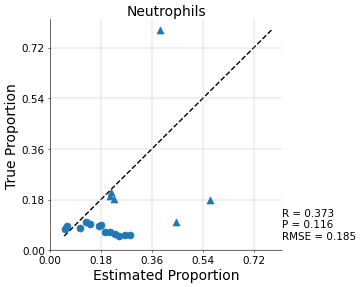

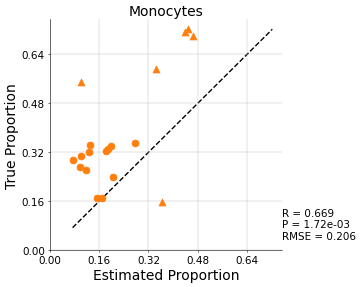

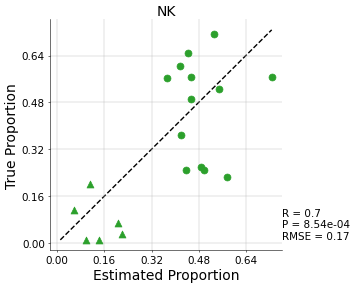

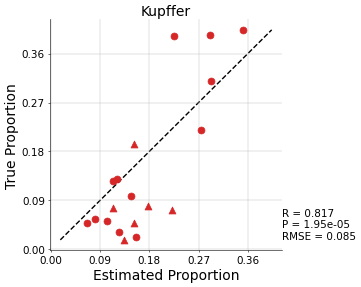

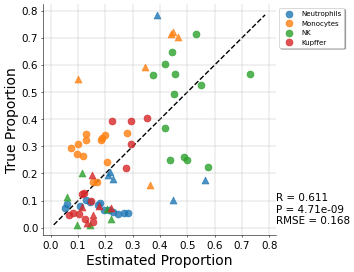

{'Kupffer': [('R', 0.8172), ('P', '1.95e-05'), ('RMSE', 0.0849)],
 'Monocytes': [('R', 0.6694), ('P', '1.72e-03'), ('RMSE', 0.2056)],
 'NK': [('R', 0.6997), ('P', '8.54e-04'), ('RMSE', 0.1699)],
 'Neutrophils': [('R', 0.3731), ('P', 0.116), ('RMSE', 0.185)]}
0.6106


In [3]:
# conduct deconv
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=['Ctrl', 'APAP'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
pp.gene_selection(method='CV',outlier=True,topn=1000)
pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
pp.deconv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
pp.deconv(n=10,add_topic=0,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=False,var_plot=False)

# evaluate
pp.evaluate(facs_df=target_facs,deconv_norm_range=['Neutrophil','Monocyte','Natural killer cell','Kupffer cell'],
            facs_norm_range=['Neutrophil','Monocyte','NK','Kupffer'],
            res_names=[['Neutrophil'],['Monocyte'],['Natural killer cell'],['Kupffer cell']],
            ref_names=[['Neutrophil'],['Monocyte'],['NK'],['Kupffer']],
            title_list = ['Neutrophils','Monocytes','NK','Kupffer'],
            target_samples = ['Ctrl', 'APAP'],
            figsize=(6,6),dpi=50,plot_size=100,multi=False,overlap=True)
print(pp.total_cor)

The circles indicate the control samples, and the triangles indicate the samples with APAP administration.

In [4]:
res = pp.merge_total_res[0]
display(res)

,Hepatocyte,Dendritic cell,Hepatoblast,Stem cell,Kupffer cell,Natural killer cell,B cell,Monocyte,Regulatory T (Treg) cell,Hepatic stellate cell,...,Erythroblast,Artery cell,Early erythrocyte,Portal vein cell,Fibroblast,Effector memory T cell,Natural killer T(NKT) cell,Liver sinusoid endothelial cell(LSECs),Macrovascular endothelial cell (MaVECs),Vascular smooth muscle cell(VSMC)
APAP_1,0.040961,0.043319,0.000002,0.009866,0.009009,0.019088,0.005578,0.023591,0.073127,0.033241,...,0.000002,0.001289,0.002575,0.085350,0.009223,0.017158,0.000002,0.010081,0.190212,0.105508
APAP_11,0.041440,0.028131,0.003028,0.024200,0.025712,0.033576,0.019360,0.157280,0.015731,0.099814,...,0.010287,0.005145,0.008774,0.088623,0.024502,0.089833,0.011194,0.006052,0.005447,0.068661
APAP_2,0.095283,0.026372,0.025669,0.030943,0.013364,0.039029,0.066805,0.111808,0.022857,0.076298,...,0.017231,0.026021,0.026724,0.004926,0.015122,0.052038,0.069969,0.017583,0.000004,0.050280
APAP_4,0.092114,0.054871,0.010977,0.032259,0.020620,0.027936,0.032924,0.123371,0.008317,0.074822,...,0.002331,0.029266,0.028933,0.005989,0.028268,0.090119,0.063849,0.014302,0.004659,0.074157
APAP_6,0.099927,0.070018,0.018017,0.034671,0.013938,0.029912,0.062540,0.108423,0.011899,0.068318,...,0.000003,0.063900,0.028893,0.003742,0.028553,0.044187,0.062200,0.028213,0.002383,0.046226
APAP_8,0.034270,0.019452,0.004942,0.023157,0.025009,0.018526,0.002473,0.147876,0.038283,0.079960,...,0.001855,0.003090,0.005251,0.072859,0.031183,0.095395,0.000929,0.005869,0.012043,0.069463
Ctrl_1,0.103443,0.021638,0.012849,0.086879,0.001017,0.033807,0.144007,0.014201,0.015891,0.033807,...,0.078428,0.000003,0.051385,0.002708,0.015215,0.002370,0.157866,0.059498,0.004398,0.007102
Ctrl_10,0.143214,0.042967,0.013590,0.070875,0.058022,0.044803,0.085930,0.009551,0.008817,0.023505,...,0.001840,0.046639,0.043334,0.000004,0.017630,0.001472,0.175896,0.088501,0.009918,0.002207
Ctrl_12,0.140682,0.053243,0.027152,0.080039,0.021863,0.045133,0.091321,0.011286,0.014812,0.031030,...,0.000004,0.061352,0.062057,0.000004,0.014459,0.004234,0.181581,0.060647,0.002824,0.001061
Ctrl_15,0.109548,0.035920,0.023349,0.088717,0.009701,0.062139,0.110985,0.027659,0.022990,0.053160,...,0.005391,0.019398,0.045617,0.000004,0.024067,0.010419,0.145464,0.059624,0.002159,0.006109


***
##### 2. Determine the number of additional topics and conduct GLDADec

In [5]:
# detect optimal empty topic number
bool_res = []
p_res = []
for add_topic in range(5,15):
    pp = pipeline.Pipeline(verbose=False)
    pp.from_predata(raw_df,target_samples=['Ctrl', 'APAP'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
    pp.gene_selection(method='CV',outlier=True,topn=1000)
    pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
    pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
    pp.deconv(n=10,add_topic=add_topic,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=False,var_plot=False)

    overlap,pflag,min_p_list,max_p_list = pp.add_profile_eval(add_topic=add_topic,alternative='greater',do_plot=False)
    bool_res.append([overlap,pflag])
    p_res.append(min_p_list)
    """
    if pflag == "Stop":
        break
    """

print(bool_res)

# Significant iterations
sig_number = []
for t in p_res:
    n = sum([i<0.05 for i in t])
    sig_number.append(n)
print(sig_number)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[[False, 'Continue'], [False, 'Continue'], [False, 'Continue'], [False, 'Continue'], [False, 'Continue'], [False, 'Continue'], [False, 'Stop'], [False, 'Stop'], [False, 'Continue'], [False, 'Stop']]
[0, 0, 0, 0, 0, 0, 1, 3, 0, 1]


- When 11 topics were added, positive correlations were detected amount the guided or added topics.
- Therefore, we selected 10 as the number of additional topics not including redundancy.


  0%|          | 0/10 [00:00<?, ?it/s]

cells in res : ['Neutrophil', 'Monocyte', 'Natural killer cell', 'Kupffer cell']
cells in ref : ['Neutrophil', 'Monocyte', 'NK', 'Kupffer']


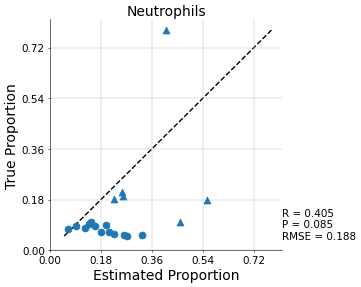

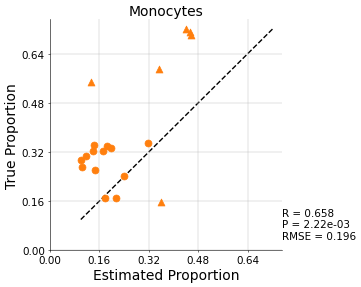

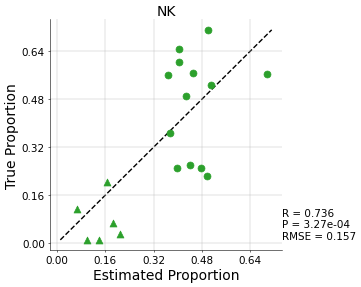

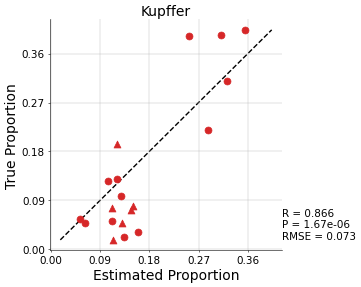

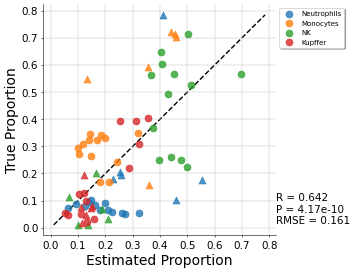

{'Kupffer': [('R', 0.8659), ('P', '1.67e-06'), ('RMSE', 0.0729)],
 'Monocytes': [('R', 0.6575), ('P', '2.22e-03'), ('RMSE', 0.1961)],
 'NK': [('R', 0.7361), ('P', '3.27e-04'), ('RMSE', 0.1568)],
 'Neutrophils': [('R', 0.4052), ('P', 0.085), ('RMSE', 0.1875)]}
0.6418


In [6]:
# single run and eval
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=['Ctrl', 'APAP'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
pp.gene_selection(method='CV',outlier=True,topn=1000)
pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
pp.deconv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
pp.deconv(n=10,add_topic=10,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=False,var_plot=False) # with the optimized number of additional topics

# evaluate
pp.evaluate(facs_df=target_facs,deconv_norm_range=['Neutrophil','Monocyte','Natural killer cell','Kupffer cell'],
            facs_norm_range=['Neutrophil','Monocyte','NK','Kupffer'],
            res_names=[['Neutrophil'],['Monocyte'],['Natural killer cell'],['Kupffer cell']],
            ref_names=[['Neutrophil'],['Monocyte'],['NK'],['Kupffer']],
            title_list = ['Neutrophils','Monocytes','NK','Kupffer'],
            target_samples = ['Ctrl', 'APAP'],
            figsize=(6,6),dpi=50,plot_size=100,multi=False,overlap=True)
print(pp.total_cor)

***
##### 3. Correlation with ALT
- Although there were no ground-truths measured by flow cytometry for cell types such as hepatocytes and VSMCs, you can evaluate the correlations with blood biochemistry values such as alanine aminotransferase (ALT) and aspartate aminotransferase (AST).

In [7]:
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

res = pp.merge_total_res[0]
info = pd.read_csv(BASE_DIR+'/data/GSE237801/blood_biochemistry_values.csv',index_col=0)

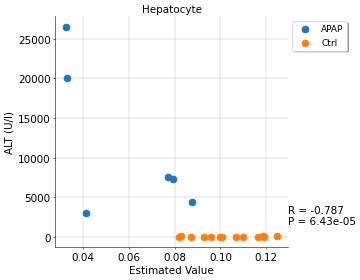

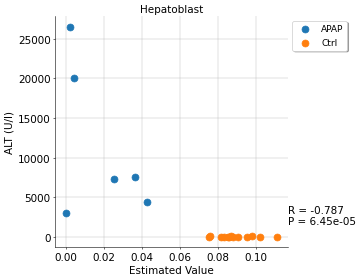

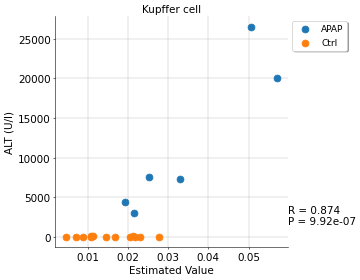

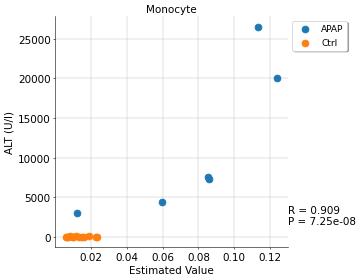

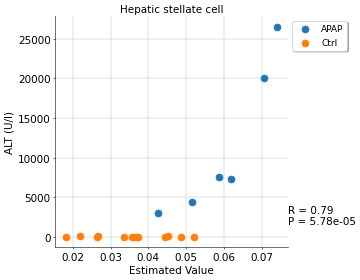

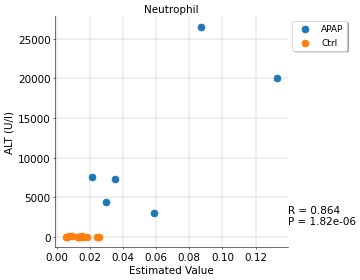

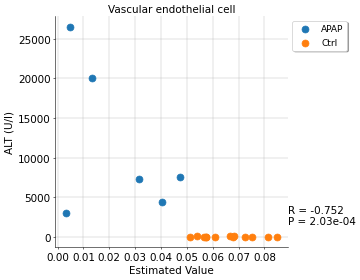

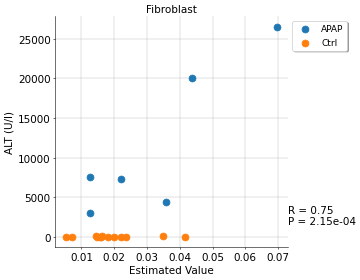

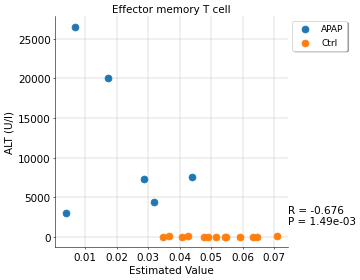

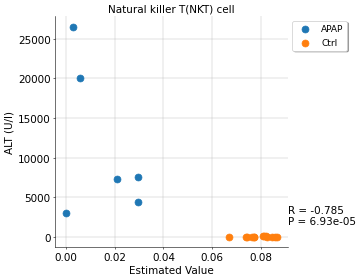

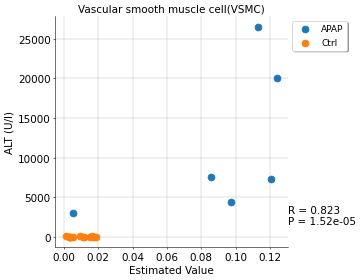

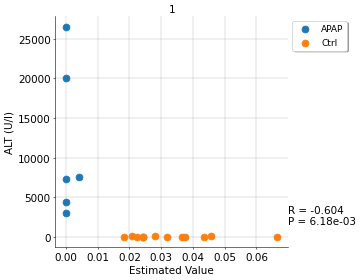

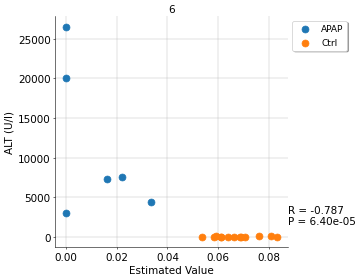

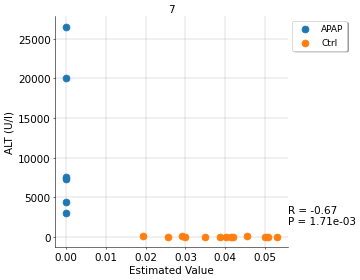

In [9]:
info.index = info['Name']
target_info = info[['ALT','AST','TBIL']]
target_info = target_info.loc[res.index]
# eval
for cell in res.columns.tolist():
    # cell = 'Hepatocyte'
    drugs = ['APAP','Ctrl']
    total_x = res[cell].tolist()
    total_y = target_info['ALT'].tolist()
    total_cor, pvalue = stats.pearsonr(total_x,total_y) # correlation and pvalue
    total_cor = round(total_cor,4)
    if abs(total_cor) < 0.6:
        continue
    
    if pvalue < 0.01:
        pvalue = '{:.2e}'.format(pvalue)
    else:
        pvalue = round(pvalue,3)
    rmse = round(np.sqrt(mean_squared_error(total_x, total_y)),4)
    performance = {'R':total_cor,'P':pvalue,'RMSE':rmse}

    fig,ax = plt.subplots(figsize=(6,6),dpi=50)
    for i,d in enumerate(drugs):
        tmp1 = res.filter(regex="^"+d+"_",axis=0)
        tmp2 = target_info.filter(regex="^"+d+"_",axis=0)
        
        res1 = tmp1[[cell]].sum(axis=1).tolist()
        res2 = tmp2[['ALT']].sum(axis=1).tolist()
        plt.scatter(res1,res2,label=d,alpha=1.0,s=100)

    plt.text(1.0,0.15,'R = {}'.format(str(round(total_cor,3))), transform=ax.transAxes, fontsize=15)
    plt.text(1.0,0.10,'P = {}'.format(str(pvalue)), transform=ax.transAxes, fontsize=15)
    plt.xlabel('Estimated Value',fontsize=15)
    plt.ylabel('ALT (U/I)',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1),shadow=True,fontsize=13)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')
    ax.set_axisbelow(True)
    ax.grid(color="#ababab",linewidth=0.5)
    plt.title(cell,fontsize=15)
    plt.show()